# Part I - (PISA Dataset Exploration)
## by (Hanan H. Hasan)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
import openai

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline

> To load the datasets of the dictionary of titles and the whole dataset:


In [3]:
# import chardet

# # Detect the encoding of the file
# with open('pisa2012.csv', 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(10000))

# # Read the CSV file using the detected encoding
# df = pd.read_csv('pisa2012.csv', encoding='latin-1')


In [4]:
dfdict = pd.read_csv('pisadict2012.csv', encoding = 'latin-1')

Since the file is very big and my local nor udacity cloud did not open it fluently, I have taken sample of 1000 rows randomly. then I did save it and work with this sampled dataset locally. I have commented out all the steps that are taken but not needed for clarification of what has been done.

In [5]:
# #As Dataframe is really big and difficult to handle on jupyter, I take random samples.

# dfsampled = pd.DataFrame()

# dfsampled = df.sample(n=1000, random_state=42) 

# dfsampled.to_csv('dfsampled.csv',index=False)

In [6]:
dfsampled = pd.read_csv('dfsampled.csv')
dfsampled

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [7]:
dfdict.head()

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
2,STRATUM,Stratum ID 7-character (cnt + region ID + original stratum ID)
3,OECD,OECD country
4,NC,National Centre 6-digit Code


> Now, since the column naming is not easy to comprehend, I will rename them according to the titles given in the dfdict. 


In [8]:
# Rename the columns and set the codes as key:
dfchangeddic = dfdict.rename(columns={'Unnamed: 0': 'code', 'x': 'title'})

In [9]:
# Convert it to dictionary:
dic = dfchangeddic.set_index('code')['title'].to_dict()

In [10]:
dic

{'CNT': 'Country code 3-character',
 'SUBNATIO': 'Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)',
 'STRATUM': 'Stratum ID 7-character (cnt + region ID + original stratum ID)',
 'OECD': 'OECD country',
 'NC': 'National Centre 6-digit Code',
 'SCHOOLID': 'School ID 7-digit (region ID + stratum ID + 3-digit school ID)',
 'STIDSTD': 'Student ID',
 'ST01Q01': 'International Grade',
 'ST02Q01': 'National Study Programme',
 'ST03Q01': 'Birth - Month',
 'ST03Q02': 'Birth -Year',
 'ST04Q01': 'Gender',
 'ST05Q01': 'Attend <ISCED 0>',
 'ST06Q01': 'Age at <ISCED 1>',
 'ST07Q01': 'Repeat - <ISCED 1>',
 'ST07Q02': 'Repeat - <ISCED 2>',
 'ST07Q03': 'Repeat - <ISCED 3>',
 'ST08Q01': 'Truancy - Late for School',
 'ST09Q01': 'Truancy - Skip whole school day',
 'ST115Q01': 'Truancy - Skip classes within school day',
 'ST11Q01': 'At Home - Mother',
 'ST11Q02': 'At Home - Father',
 'ST11Q03': 'At Home - Brothers',
 'ST11Q04': 'At Home - Sisters',
 'ST11Q05': 'At H

In [11]:
#Rename the database column names: 
df_renamed = dfsampled.rename(columns=dic)
df_renamed.head()

,Unnamed: 0,Country code 3-character,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID),Stratum ID 7-character (cnt + region ID + original stratum ID),OECD country,National Centre 6-digit Code,School ID 7-digit (region ID + stratum ID + 3-digit school ID),Student ID,International Grade,National Study Programme,Birth - Month,Birth -Year,Gender,Attend <ISCED 0>,Age at <ISCED 1>,Repeat - <ISCED 1>,Repeat - <ISCED 2>,Repeat - <ISCED 3>,Truancy - Late for School,Truancy - Skip whole school day,Truancy - Skip classes within school day,At Home - Mother,At Home - Father,At Home - Brothers,At Home - Sisters,At Home - Grandparents,At Home - Others,Mother<Highest Schooling>,Mother Qualifications - <ISCED level 6>,Mother Qualifications - <ISCED level 5A>,Mother Qualifications - <ISCED level 5B>,Mother Qualifications - <ISCED level 4>,Mother Current Job Status,Father<Highest Schooling>,Father Qualifications - <ISCED level 6>,Father Qualifications - <ISCED level 5A>,Father Qualifications - <ISCED level 5B>,Father Qualifications - <ISCED level 4>,Father Current Job Status,Country of Birth International - Self,Country of Birth International - Mother,Country of Birth International - Father,Age of arrival in <country of test>,International Language at Home,Possessions - desk,Possessions - own room,Possessions - study place,Possessions - computer,Possessions - software,Possessions - Internet,Possessions - literature,Possessions - poetry,Possessions - art,Possessions - textbooks,Possessions - <technical reference books>,Possessions - dictionary,Possessions - dishwasher,Possessions - <DVD>,Possessions - <Country item 1>,Possessions - <Country item 2>,Possessions - <Country item 3>,How many - cellular phones,How many - televisions,How many - computers,How many - cars,How many - rooms bath or shower,How many books at home,Math Interest - Enjoy Reading,Instrumental Motivation - Worthwhile for Work,Math Interest - Look Forward to Lessons,Math Interest - Enjoy Maths,Instrumental Motivation - Worthwhile for Career Chances,Math Interest - Interested,Instrumental Motivation - Important for Future Study,Instrumental Motivation - Helps to Get a Job,Subjective Norms -Friends Do Well in Mathematics,Subjective Norms -Friends Work Hard on Mathematics,Subjective Norms - Friends Enjoy Mathematics Tests,Subjective Norms - Parents Believe Studying Mathematics Is Important,Subjective Norms - Parents Believe Mathematics Is Important for Career,Subjective Norms - Parents Like Mathematics,Math Self-Efficacy - Using a <Train Timetable>,Math Self-Efficacy - Calculating TV Discount,Math Self-Efficacy - Calculating Square Metres of Tiles,Math Self-Efficacy - Understanding Graphs in Newspapers,Math Self-Efficacy - Solving Equation 1,Math Self-Efficacy - Distance to Scale,Math Self-Efficacy - Solving Equation 2,Math Self-Efficacy - Calculate Petrol Consumption Rate,Math Anxiety - Worry That It Will Be Difficult,Math Self-Concept - Not Good at Maths,Math Anxiety - Get Very Tense,Math Self-Concept- Get Good <Grades>,Math Anxiety - Get Very Nervous,Math Self-Concept - Learn Quickly,Math Self-Concept - One of Best Subjects,Math Anxiety - Feel Helpless,Math Self-Concept - Understand Difficult Work,Math Anxiety - Worry About Getting Poor <Grades>,Perceived Control - Can Succeed with Enough Effort,Perceived Control - Doing Well is Completely Up to Me,Perceived Control - Family Demands and Problems,Perceived Control - Different Teachers,Perceived Control - If I Wanted I Could Perform Well,Perceived Control - Perform Poorly Regardless,Attributions to Failure - Not Good at Maths Problems,Attributions to Failure - Teacher Did Not Explain Well,Attributions to Failure - Bad Guesses,Attributions to Failure - Material Too Hard,Attributions to Failure - Teacher Didnt Get Students Interested,Attributions to Failure - Unlucky,Math Work Ethic - Homework Completed in Time,Math Work Ethic - Work Hard on Homework,Math Work Ethic - Prepared for Exams,Math Work

In [12]:
# Rename to simplify and clarify more:
prepared = df_renamed.rename(columns={'Unnamed: 0': 'id'})

In [13]:
prepared

,id,Country code 3-character,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID),Stratum ID 7-character (cnt + region ID + original stratum ID),OECD country,National Centre 6-digit Code,School ID 7-digit (region ID + stratum ID + 3-digit school ID),Student ID,International Grade,National Study Programme,Birth - Month,Birth -Year,Gender,Attend <ISCED 0>,Age at <ISCED 1>,Repeat - <ISCED 1>,Repeat - <ISCED 2>,Repeat - <ISCED 3>,Truancy - Late for School,Truancy - Skip whole school day,Truancy - Skip classes within school day,At Home - Mother,At Home - Father,At Home - Brothers,At Home - Sisters,At Home - Grandparents,At Home - Others,Mother<Highest Schooling>,Mother Qualifications - <ISCED level 6>,Mother Qualifications - <ISCED level 5A>,Mother Qualifications - <ISCED level 5B>,Mother Qualifications - <ISCED level 4>,Mother Current Job Status,Father<Highest Schooling>,Father Qualifications - <ISCED level 6>,Father Qualifications - <ISCED level 5A>,Father Qualifications - <ISCED level 5B>,Father Qualifications - <ISCED level 4>,Father Current Job Status,Country of Birth International - Self,Country of Birth International - Mother,Country of Birth International - Father,Age of arrival in <country of test>,International Language at Home,Possessions - desk,Possessions - own room,Possessions - study place,Possessions - computer,Possessions - software,Possessions - Internet,Possessions - literature,Possessions - poetry,Possessions - art,Possessions - textbooks,Possessions - <technical reference books>,Possessions - dictionary,Possessions - dishwasher,Possessions - <DVD>,Possessions - <Country item 1>,Possessions - <Country item 2>,Possessions - <Country item 3>,How many - cellular phones,How many - televisions,How many - computers,How many - cars,How many - rooms bath or shower,How many books at home,Math Interest - Enjoy Reading,Instrumental Motivation - Worthwhile for Work,Math Interest - Look Forward to Lessons,Math Interest - Enjoy Maths,Instrumental Motivation - Worthwhile for Career Chances,Math Interest - Interested,Instrumental Motivation - Important for Future Study,Instrumental Motivation - Helps to Get a Job,Subjective Norms -Friends Do Well in Mathematics,Subjective Norms -Friends Work Hard on Mathematics,Subjective Norms - Friends Enjoy Mathematics Tests,Subjective Norms - Parents Believe Studying Mathematics Is Important,Subjective Norms - Parents Believe Mathematics Is Important for Career,Subjective Norms - Parents Like Mathematics,Math Self-Efficacy - Using a <Train Timetable>,Math Self-Efficacy - Calculating TV Discount,Math Self-Efficacy - Calculating Square Metres of Tiles,Math Self-Efficacy - Understanding Graphs in Newspapers,Math Self-Efficacy - Solving Equation 1,Math Self-Efficacy - Distance to Scale,Math Self-Efficacy - Solving Equation 2,Math Self-Efficacy - Calculate Petrol Consumption Rate,Math Anxiety - Worry That It Will Be Difficult,Math Self-Concept - Not Good at Maths,Math Anxiety - Get Very Tense,Math Self-Concept- Get Good <Grades>,Math Anxiety - Get Very Nervous,Math Self-Concept - Learn Quickly,Math Self-Concept - One of Best Subjects,Math Anxiety - Feel Helpless,Math Self-Concept - Understand Difficult Work,Math Anxiety - Worry About Getting Poor <Grades>,Perceived Control - Can Succeed with Enough Effort,Perceived Control - Doing Well is Completely Up to Me,Perceived Control - Family Demands and Problems,Perceived Control - Different Teachers,Perceived Control - If I Wanted I Could Perform Well,Perceived Control - Perform Poorly Regardless,Attributions to Failure - Not Good at Maths Problems,Attributions to Failure - Teacher Did Not Explain Well,Attributions to Failure - Bad Guesses,Attributions to Failure - Material Too Hard,Attributions to Failure - Teacher Didnt Get Students Interested,Attributions to Failure - Unlucky,Math Work Ethic - Homework Completed in Time,Math Work Ethic - Work Hard on Homework,Math Work Ethic - Prepared for Exams,Math Work Ethic -

In [14]:
prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 636 entries, id to Date of the database creation
dtypes: float64(250), int64(18), object(368)
memory usage: 4.9+ MB


In [15]:
prepared.dtypes

id                                                                                            int64
Country code 3-character                                                                     object
Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)      int64
Stratum ID 7-character (cnt + region ID + original stratum ID)                               object
OECD country                                                                                 object
                                                                                             ...   
FINAL STUDENT REPLICATE BRR-FAY WEIGHT80                                                    float64
RANDOMIZED FINAL VARIANCE STRATUM (1-80)                                                      int64
RANDOMLY ASSIGNED VARIANCE UNIT                                                               int64
Senate weight - sum of weight within the country is 1000                                    float64


In [16]:
prepared.head(10)

,id,Country code 3-character,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID),Stratum ID 7-character (cnt + region ID + original stratum ID),OECD country,National Centre 6-digit Code,School ID 7-digit (region ID + stratum ID + 3-digit school ID),Student ID,International Grade,National Study Programme,Birth - Month,Birth -Year,Gender,Attend <ISCED 0>,Age at <ISCED 1>,Repeat - <ISCED 1>,Repeat - <ISCED 2>,Repeat - <ISCED 3>,Truancy - Late for School,Truancy - Skip whole school day,Truancy - Skip classes within school day,At Home - Mother,At Home - Father,At Home - Brothers,At Home - Sisters,At Home - Grandparents,At Home - Others,Mother<Highest Schooling>,Mother Qualifications - <ISCED level 6>,Mother Qualifications - <ISCED level 5A>,Mother Qualifications - <ISCED level 5B>,Mother Qualifications - <ISCED level 4>,Mother Current Job Status,Father<Highest Schooling>,Father Qualifications - <ISCED level 6>,Father Qualifications - <ISCED level 5A>,Father Qualifications - <ISCED level 5B>,Father Qualifications - <ISCED level 4>,Father Current Job Status,Country of Birth International - Self,Country of Birth International - Mother,Country of Birth International - Father,Age of arrival in <country of test>,International Language at Home,Possessions - desk,Possessions - own room,Possessions - study place,Possessions - computer,Possessions - software,Possessions - Internet,Possessions - literature,Possessions - poetry,Possessions - art,Possessions - textbooks,Possessions - <technical reference books>,Possessions - dictionary,Possessions - dishwasher,Possessions - <DVD>,Possessions - <Country item 1>,Possessions - <Country item 2>,Possessions - <Country item 3>,How many - cellular phones,How many - televisions,How many - computers,How many - cars,How many - rooms bath or shower,How many books at home,Math Interest - Enjoy Reading,Instrumental Motivation - Worthwhile for Work,Math Interest - Look Forward to Lessons,Math Interest - Enjoy Maths,Instrumental Motivation - Worthwhile for Career Chances,Math Interest - Interested,Instrumental Motivation - Important for Future Study,Instrumental Motivation - Helps to Get a Job,Subjective Norms -Friends Do Well in Mathematics,Subjective Norms -Friends Work Hard on Mathematics,Subjective Norms - Friends Enjoy Mathematics Tests,Subjective Norms - Parents Believe Studying Mathematics Is Important,Subjective Norms - Parents Believe Mathematics Is Important for Career,Subjective Norms - Parents Like Mathematics,Math Self-Efficacy - Using a <Train Timetable>,Math Self-Efficacy - Calculating TV Discount,Math Self-Efficacy - Calculating Square Metres of Tiles,Math Self-Efficacy - Understanding Graphs in Newspapers,Math Self-Efficacy - Solving Equation 1,Math Self-Efficacy - Distance to Scale,Math Self-Efficacy - Solving Equation 2,Math Self-Efficacy - Calculate Petrol Consumption Rate,Math Anxiety - Worry That It Will Be Difficult,Math Self-Concept - Not Good at Maths,Math Anxiety - Get Very Tense,Math Self-Concept- Get Good <Grades>,Math Anxiety - Get Very Nervous,Math Self-Concept - Learn Quickly,Math Self-Concept - One of Best Subjects,Math Anxiety - Feel Helpless,Math Self-Concept - Understand Difficult Work,Math Anxiety - Worry About Getting Poor <Grades>,Perceived Control - Can Succeed with Enough Effort,Perceived Control - Doing Well is Completely Up to Me,Perceived Control - Family Demands and Problems,Perceived Control - Different Teachers,Perceived Control - If I Wanted I Could Perform Well,Perceived Control - Perform Poorly Regardless,Attributions to Failure - Not Good at Maths Problems,Attributions to Failure - Teacher Did Not Explain Well,Attributions to Failure - Bad Guesses,Attributions to Failure - Material Too Hard,Attributions to Failure - Teacher Didnt Get Students Interested,Attributions to Failure - Unlucky,Math Work Ethic - Homework Completed in Time,Math Work Ethic - Work Hard on Homework,Math Work Ethic - Prepared for Exams,Math Work Ethic -

In [17]:
prepared.describe()

,id,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID),School ID 7-digit (region ID + stratum ID + 3-digit school ID),Student ID,International Grade,National Study Programme,Birth - Month,Birth -Year,Age at <ISCED 1>,Truancy - Skip classes within school day,Age of arrival in <country of test>,Possessions - <Country item 1>,Possessions - <Country item 2>,Possessions - <Country item 3>,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Out-of-School Study Time - Computer,Min in <class period> - <test lang>,Min in <class period> - <Maths>,Min in <class period> - <Science>,No of <class period> p/wk - <test lang>,No of <class period> p/wk - <Maths>,No of <class period> p/wk - <Science>,No of ALL <class period> a week,Class Size - No of Students in <Test Language> Class,Problem Route Selection - Read brochure,Problem Route Selection - Study map,Problem Route Selection - Leave it to brother,Problem Route Selection - Just drive,Problem Ticket Machine - Similarities,Problem Ticket Machine - Try buttons,Problem Ticket Machine - Ask for help,Problem Ticket Machine - Find ticket office,Internet at School,Internet out-of-school - Weekday,Internet out-of-school - Weekend,"Acquired skills - Find job info - Yes, at school","Acquired skills - Find job info - Yes, out of school","Acquired skills - Find job info - No, never","Acquired skills - Search for job - Yes, at school","Acquired skills - Search for job - Yes, out of school","Acquired skills - Search for job - No, never","Acquired skills - Write resume - Yes, at school","Acquired skills - Write resume - Yes, out of school","Acquired skills - Write resume - No, never","Acquired skills - Job interview - Yes, at school","Acquired skills - Job interview - Yes, out of school","Acquired skills - Job interview - No, never","Acquired skills - ISCED 3-5 programs - Yes, at school","Acquired skills - ISCED 3-5 programs - Yes, out of school","Acquired skills - ISCED 3-5 programs - No, never","Acquired skills - Student financing - Yes, at school","Acquired skills - Student financing - Yes, out of school","Acquired skills - Student financing - No, never",Effort-real 1,Effort-real 2,Difference in Effort,Age of student,Grade compared to modal grade in country,Mathematics Anxiety,Attitude towards School: Learning Outcomes,Attitude towards School: Learning Activities,Sense of Belonging to School,Father SQ ISEI,Mother SQ ISEI,Mathematics Teacher's Classroom Management,Cognitive Activation in Mathematics Lessons,Cultural Distance between Host and Heritage Culture,Cultural Possessions,Disciplinary Climate,ICT Entertainment Use,"Index of economic, social and cultural status",Experience with Applied Mathematics Tasks at School,Experience with Pure Mathematics Tasks at School,Attributions to Failure in Mathematics,Familiarity with Mathematical Concepts,Familiarity with Mathematical Concepts (Signal Detection Adjusted),Family Structure,Home educational resources,Acculturation: Heritage Culture Oriented Strategies,Highest parental occupational status,Home Possessions,ICT Use at Home for School-related Tasks,Acculturation: Host Culture Oriented Strategies,Attitudes Towards Computers: Limitations of the Computer as a Tool for School Learning,Attitudes Towards Computers: Computer as a Tool for School Learning,ICT Availability at Home,ICT resources,ICT Availability at School,Information about Careers,Information about the Labour Market provided by the School,Information about the Labour Market provided outside of School,Instrumental Motivation for Mathematics,Mathematics Interest,Preference for Heritage Language in Conversations with Family and Friends,Preference for Heritage Language in Language Reception and Production,Learning time (minutes per week) - <test language>,Mathematics Behaviour,Mathematics Self-Efficacy,Mathematics

### What is the structure of your dataset?

> (485490,636)

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how geography is relatable to predicting the distribution of succesful students.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that student's origin and hardwork will have the strongest effect on students first round pass in the exams: the more dediacted the student personally, the higher the chance. I also think that the other environmental factors: from family and school environment, will have effects on the success, though to a much smaller degree than the main effect of hardworking.


## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: International Grade, and Country the tests have been done.



In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [18]:
prepared['International Grade'].dtypes

dtype('int64')

In [19]:
igtype_changed = prepared.copy()
igtype_changed['International Grade'].dtype

dtype('int64')

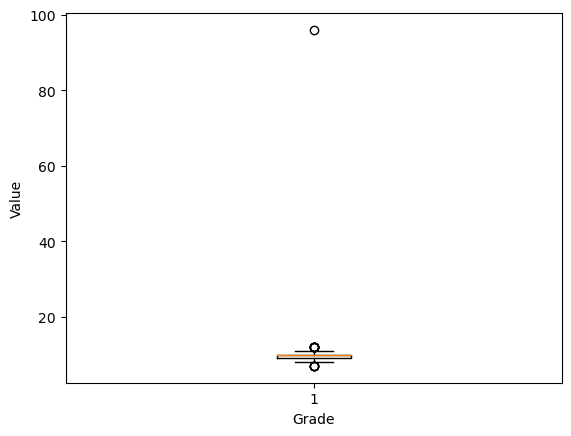

In [20]:
# Create boxplot
plt.boxplot(x= igtype_changed['International Grade'])

# Label axes
plt.xlabel('Grade')
plt.ylabel('Value')

# Show plot
plt.show()


There is clearly an outlier, to visualize deeper level of which grades are mostly achieved, here is a way to do it:

In [21]:
igtype_changed[igtype_changed['International Grade'] == 96]

,id,Country code 3-character,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID),Stratum ID 7-character (cnt + region ID + original stratum ID),OECD country,National Centre 6-digit Code,School ID 7-digit (region ID + stratum ID + 3-digit school ID),Student ID,International Grade,National Study Programme,Birth - Month,Birth -Year,Gender,Attend <ISCED 0>,Age at <ISCED 1>,Repeat - <ISCED 1>,Repeat - <ISCED 2>,Repeat - <ISCED 3>,Truancy - Late for School,Truancy - Skip whole school day,Truancy - Skip classes within school day,At Home - Mother,At Home - Father,At Home - Brothers,At Home - Sisters,At Home - Grandparents,At Home - Others,Mother<Highest Schooling>,Mother Qualifications - <ISCED level 6>,Mother Qualifications - <ISCED level 5A>,Mother Qualifications - <ISCED level 5B>,Mother Qualifications - <ISCED level 4>,Mother Current Job Status,Father<Highest Schooling>,Father Qualifications - <ISCED level 6>,Father Qualifications - <ISCED level 5A>,Father Qualifications - <ISCED level 5B>,Father Qualifications - <ISCED level 4>,Father Current Job Status,Country of Birth International - Self,Country of Birth International - Mother,Country of Birth International - Father,Age of arrival in <country of test>,International Language at Home,Possessions - desk,Possessions - own room,Possessions - study place,Possessions - computer,Possessions - software,Possessions - Internet,Possessions - literature,Possessions - poetry,Possessions - art,Possessions - textbooks,Possessions - <technical reference books>,Possessions - dictionary,Possessions - dishwasher,Possessions - <DVD>,Possessions - <Country item 1>,Possessions - <Country item 2>,Possessions - <Country item 3>,How many - cellular phones,How many - televisions,How many - computers,How many - cars,How many - rooms bath or shower,How many books at home,Math Interest - Enjoy Reading,Instrumental Motivation - Worthwhile for Work,Math Interest - Look Forward to Lessons,Math Interest - Enjoy Maths,Instrumental Motivation - Worthwhile for Career Chances,Math Interest - Interested,Instrumental Motivation - Important for Future Study,Instrumental Motivation - Helps to Get a Job,Subjective Norms -Friends Do Well in Mathematics,Subjective Norms -Friends Work Hard on Mathematics,Subjective Norms - Friends Enjoy Mathematics Tests,Subjective Norms - Parents Believe Studying Mathematics Is Important,Subjective Norms - Parents Believe Mathematics Is Important for Career,Subjective Norms - Parents Like Mathematics,Math Self-Efficacy - Using a <Train Timetable>,Math Self-Efficacy - Calculating TV Discount,Math Self-Efficacy - Calculating Square Metres of Tiles,Math Self-Efficacy - Understanding Graphs in Newspapers,Math Self-Efficacy - Solving Equation 1,Math Self-Efficacy - Distance to Scale,Math Self-Efficacy - Solving Equation 2,Math Self-Efficacy - Calculate Petrol Consumption Rate,Math Anxiety - Worry That It Will Be Difficult,Math Self-Concept - Not Good at Maths,Math Anxiety - Get Very Tense,Math Self-Concept- Get Good <Grades>,Math Anxiety - Get Very Nervous,Math Self-Concept - Learn Quickly,Math Self-Concept - One of Best Subjects,Math Anxiety - Feel Helpless,Math Self-Concept - Understand Difficult Work,Math Anxiety - Worry About Getting Poor <Grades>,Perceived Control - Can Succeed with Enough Effort,Perceived Control - Doing Well is Completely Up to Me,Perceived Control - Family Demands and Problems,Perceived Control - Different Teachers,Perceived Control - If I Wanted I Could Perform Well,Perceived Control - Perform Poorly Regardless,Attributions to Failure - Not Good at Maths Problems,Attributions to Failure - Teacher Did Not Explain Well,Attributions to Failure - Bad Guesses,Attributions to Failure - Material Too Hard,Attributions to Failure - Teacher Didnt Get Students Interested,Attributions to Failure - Unlucky,Math Work Ethic - Homework Completed in Time,Math Work Ethic - Work Hard on Homework,Math Work Ethic - Prepared for Exams,Math Work Ethic -

As International Grading system is on 10, I filter them so those which are probably misrecorded would not interfere with the results:

In [27]:
outliers_gone = igtype_changed[igtype_changed['International Grade'] <=10]
outliers_gone['National Centre 6-digit Code'].value_counts()

Italy                        62
Mexico                       54
Spain                        45
Switzerland                  38
Canada                       37
                             ..
Iceland                       6
France                        6
Lithuania                     4
Austria                       4
Perm (Russian Federation)     4
Name: National Centre 6-digit Code, Length: 62, dtype: int64

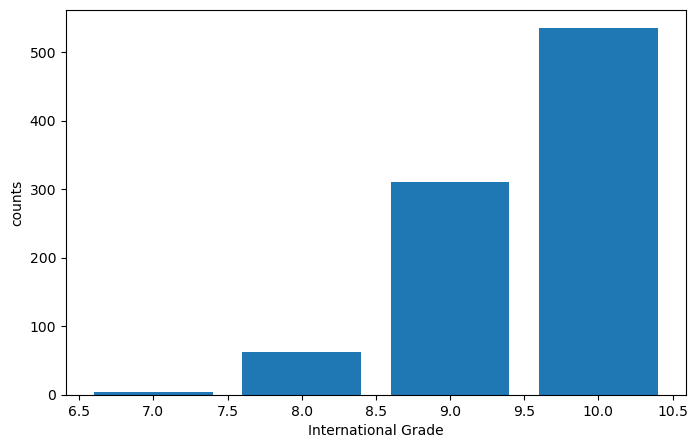

In [28]:
plt.figure(figsize = [8, 5]) 

# Return the Series having unique values
x = outliers_gone['International Grade'].unique()
y = outliers_gone['International Grade'].value_counts(sort = False)
# Return the Series having frequency count of each unique value
plt.bar(x, y)
# Labeling the axes
plt.xlabel('International Grade')
plt.ylabel('counts')
plt.show()


The plot shows that:
There are 535 records with an International Grade of 10.
There are 311 records with an International Grade of 9.
There are 63 records with an International Grade of 8.
There are 4 records with an International Grade of 7.
the majority of values in the International Grade column are between 9 and 10.

> Next is to Visualize how is nationally expressed:

In [30]:
# Returns the sum of all not-null values in `type` column
country_sum = outliers_gone['National Centre 6-digit Code'].value_counts().sum()

# By default, returns the decreasing order of the frequency.
country_count = outliers_gone['National Centre 6-digit Code'].value_counts()

## Return the highest frequency in the `type` column
max_type_count = country_count[0]

total_records = len(outliers_gone['National Centre 6-digit Code'])
country_ratio = country_count/total_records
country_order = country_count.index

## Return the maximum proportion, or in other words, 
## compute the length of the longest bar in terms of the proportion
prop = max_type_count / country_sum



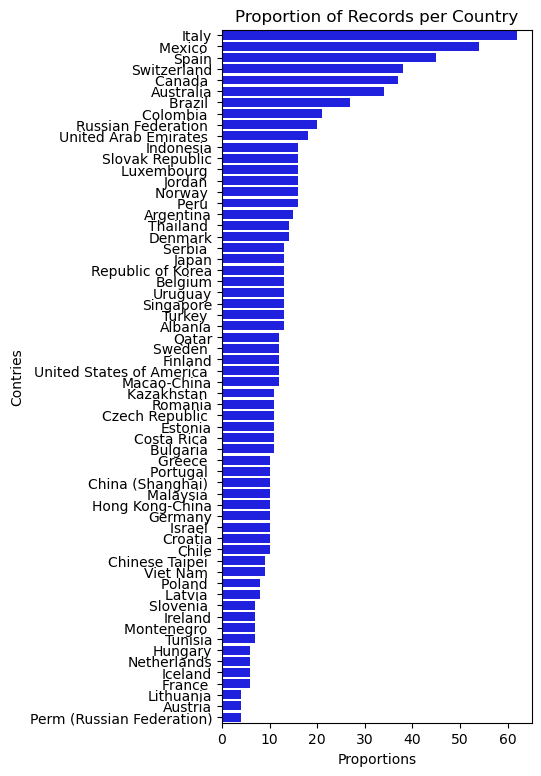

In [41]:
from matplotlib import rcParams


# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 4,9
sb.countplot(outliers_gone, y = 'National Centre 6-digit Code', color = 'blue', order = country_order)
plt.xlabel('Number of Records')
plt.ylabel('Contries')
plt.xlabel('Proportions');
plt.title('Proportion of Records per Country')
plt.show()

The plotted bar chart having the proportions, instead of the actual count, on one of the axes. It interestingly shows the distribution of contributors among the dataset, which Italy, Mexico, Spain, and Switzerland have the most students. As to keep it miind not to interfere with results of them.

As most of the frequent countries are among (OECD Countries), let us see if this proved by a pie chart:

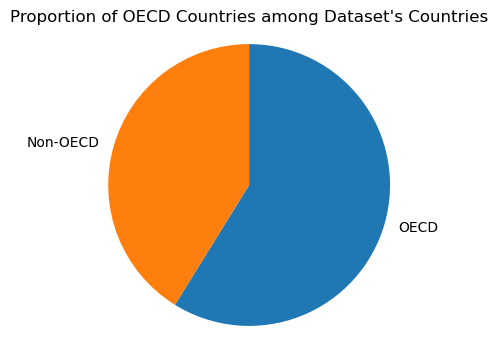

In [42]:
# Use the same dataset
sorted_counts = outliers_gone['OECD country'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title("Proportion of OECD Countries among Dataset's Countries")
plt.axis('square');

It is clear from the pie chart most of my data is from OCED countries.

Now Next to see students spendture time: 

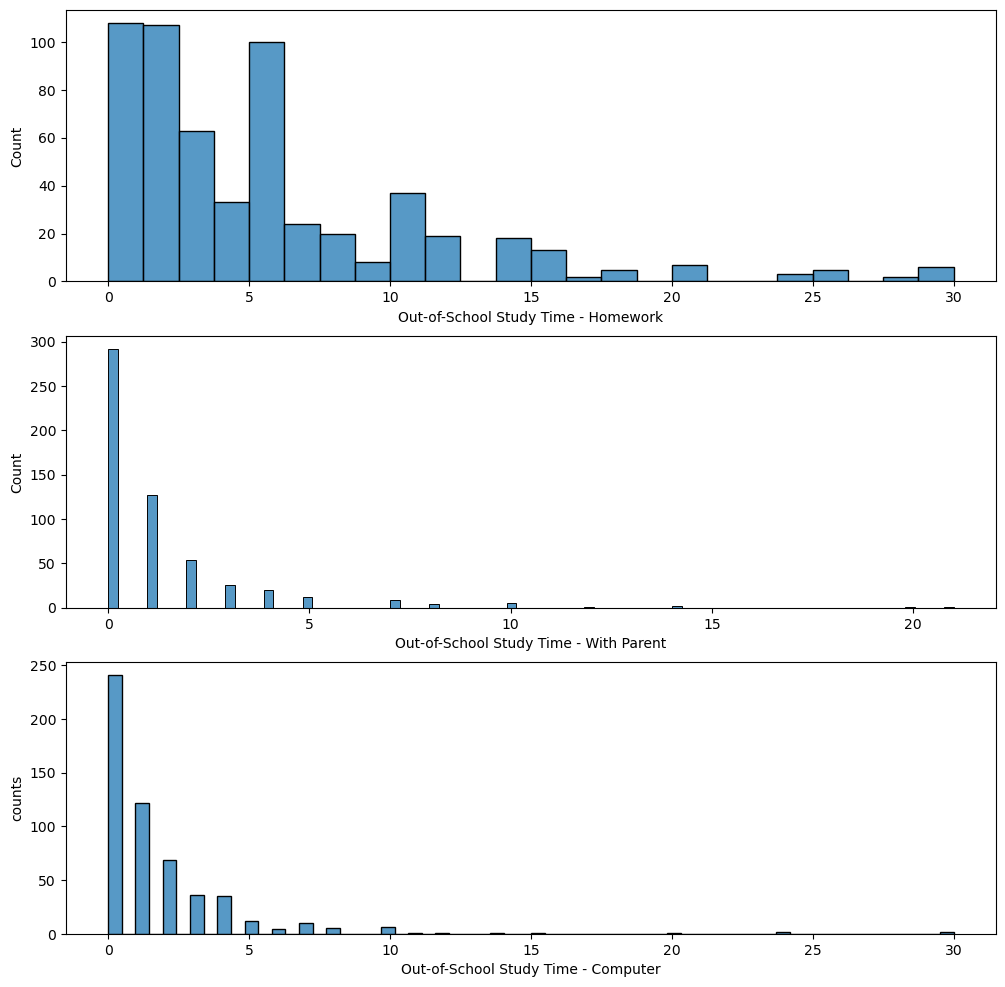

In [43]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,12])

default_color = sb.color_palette()[0]
sb.histplot(data = outliers_gone, x = 'Out-of-School Study Time - Homework', color = default_color, ax = ax[0])
sb.histplot(data = outliers_gone, x = 'Out-of-School Study Time - With Parent', color = default_color, ax = ax[1])
sb.histplot(data = outliers_gone, x = 'Out-of-School Study Time - Computer', color = default_color, ax = ax[2])

plt.ylabel('counts')
plt.show()
plt.show()

The data from the histograms shows students spend more time in terms of hours on homework than spending time with family and outside school explorations.

I'll now look at the other features in the data to see if any of them hold interesting properties.

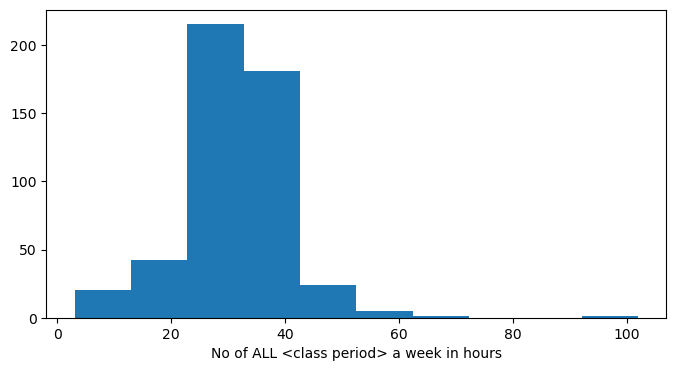

In [48]:
# let's start with the major dimensions of the diamonds, with x, y, and z.

fig = plt.subplots(figsize = [8,4])

variables = ['No of ALL <class period> a week']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(outliers_gone[var]), max(outliers_gone[var])+0.2, 0.2)
    plt.hist(data = outliers_gone, x = var)
    plt.xlabel('{} in hours'.format(var))

plt.show()

In [49]:
outliers_gone[outliers_gone['No of ALL <class period> a week'] >= 100]

,id,Country code 3-character,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID),Stratum ID 7-character (cnt + region ID + original stratum ID),OECD country,National Centre 6-digit Code,School ID 7-digit (region ID + stratum ID + 3-digit school ID),Student ID,International Grade,National Study Programme,Birth - Month,Birth -Year,Gender,Attend <ISCED 0>,Age at <ISCED 1>,Repeat - <ISCED 1>,Repeat - <ISCED 2>,Repeat - <ISCED 3>,Truancy - Late for School,Truancy - Skip whole school day,Truancy - Skip classes within school day,At Home - Mother,At Home - Father,At Home - Brothers,At Home - Sisters,At Home - Grandparents,At Home - Others,Mother<Highest Schooling>,Mother Qualifications - <ISCED level 6>,Mother Qualifications - <ISCED level 5A>,Mother Qualifications - <ISCED level 5B>,Mother Qualifications - <ISCED level 4>,Mother Current Job Status,Father<Highest Schooling>,Father Qualifications - <ISCED level 6>,Father Qualifications - <ISCED level 5A>,Father Qualifications - <ISCED level 5B>,Father Qualifications - <ISCED level 4>,Father Current Job Status,Country of Birth International - Self,Country of Birth International - Mother,Country of Birth International - Father,Age of arrival in <country of test>,International Language at Home,Possessions - desk,Possessions - own room,Possessions - study place,Possessions - computer,Possessions - software,Possessions - Internet,Possessions - literature,Possessions - poetry,Possessions - art,Possessions - textbooks,Possessions - <technical reference books>,Possessions - dictionary,Possessions - dishwasher,Possessions - <DVD>,Possessions - <Country item 1>,Possessions - <Country item 2>,Possessions - <Country item 3>,How many - cellular phones,How many - televisions,How many - computers,How many - cars,How many - rooms bath or shower,How many books at home,Math Interest - Enjoy Reading,Instrumental Motivation - Worthwhile for Work,Math Interest - Look Forward to Lessons,Math Interest - Enjoy Maths,Instrumental Motivation - Worthwhile for Career Chances,Math Interest - Interested,Instrumental Motivation - Important for Future Study,Instrumental Motivation - Helps to Get a Job,Subjective Norms -Friends Do Well in Mathematics,Subjective Norms -Friends Work Hard on Mathematics,Subjective Norms - Friends Enjoy Mathematics Tests,Subjective Norms - Parents Believe Studying Mathematics Is Important,Subjective Norms - Parents Believe Mathematics Is Important for Career,Subjective Norms - Parents Like Mathematics,Math Self-Efficacy - Using a <Train Timetable>,Math Self-Efficacy - Calculating TV Discount,Math Self-Efficacy - Calculating Square Metres of Tiles,Math Self-Efficacy - Understanding Graphs in Newspapers,Math Self-Efficacy - Solving Equation 1,Math Self-Efficacy - Distance to Scale,Math Self-Efficacy - Solving Equation 2,Math Self-Efficacy - Calculate Petrol Consumption Rate,Math Anxiety - Worry That It Will Be Difficult,Math Self-Concept - Not Good at Maths,Math Anxiety - Get Very Tense,Math Self-Concept- Get Good <Grades>,Math Anxiety - Get Very Nervous,Math Self-Concept - Learn Quickly,Math Self-Concept - One of Best Subjects,Math Anxiety - Feel Helpless,Math Self-Concept - Understand Difficult Work,Math Anxiety - Worry About Getting Poor <Grades>,Perceived Control - Can Succeed with Enough Effort,Perceived Control - Doing Well is Completely Up to Me,Perceived Control - Family Demands and Problems,Perceived Control - Different Teachers,Perceived Control - If I Wanted I Could Perform Well,Perceived Control - Perform Poorly Regardless,Attributions to Failure - Not Good at Maths Problems,Attributions to Failure - Teacher Did Not Explain Well,Attributions to Failure - Bad Guesses,Attributions to Failure - Material Too Hard,Attributions to Failure - Teacher Didnt Get Students Interested,Attributions to Failure - Unlucky,Math Work Ethic - Homework Completed in Time,Math Work Ethic - Work Hard on Homework,Math Work Ethic - Prepared for Exams,Math Work Ethic -

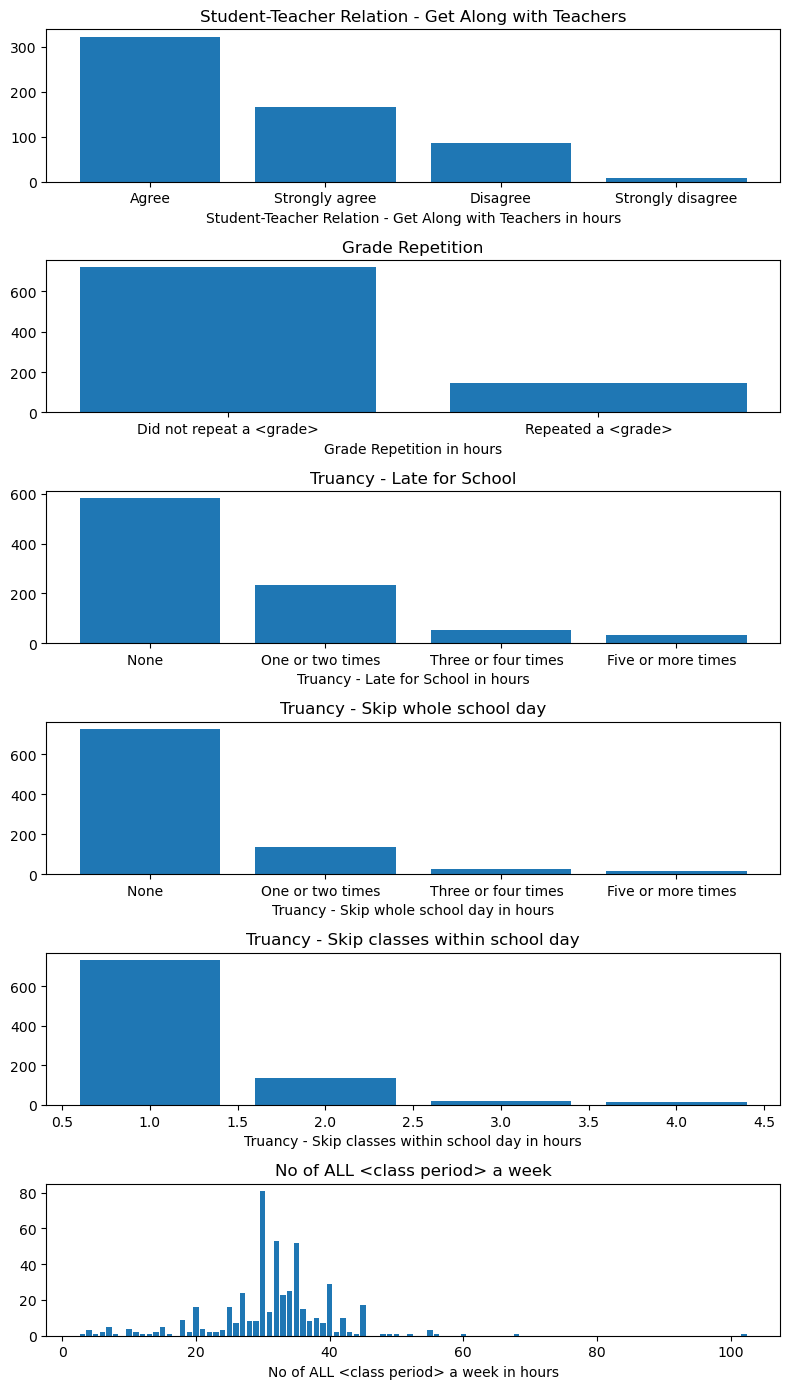

In [36]:
# let's start with the major school wise facts that may contribute, student-teacher relation, any Tuancy in respect of time and type, number of classes in hours, and grade repition.

fig, ax = plt.subplots(nrows=6, figsize=[8, 14])

variables = ['Student-Teacher Relation - Get Along with Teachers', 
             'Grade Repetition', 
             'Truancy - Late for School', 
             'Truancy - Skip whole school day', 
             'Truancy - Skip classes within school day',
             'No of ALL <class period> a week']

for i, var in enumerate(variables):
    ax[i].bar(x=outliers_gone[var].value_counts().index, 
              height=outliers_gone[var].value_counts().values)
    ax[i].set_xlabel('{} in hours'.format(var))
    ax[i].set_title(var)

plt.tight_layout()
plt.show();




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

